In [1]:
import tushare as ts
token = '6feca07b866ea55bd6024aa5a8891d7bc11afd829d1386c8a2fc8d89'
pro = ts.pro_api(token)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import datetime
import pandas as pd
import numpy as np
import time
import requests
from IPython.core.display import HTML

### 1. 下载数据 - ETF300

In [19]:
# choose fund
start_date_str = '20150101'
end_date_str = '20181231'

In [20]:
def get_price(code_name, code, start_date_str, end_date_str):
    p_t = ['trade_date', 'close'] #['trade_date', 'open', 'high', 'low', 'close', 'vol', 'pct_chg']
    
    #get data
    price = pro.fund_daily(ts_code=code, start_date=start_date_str, end_date=end_date_str)

    # set date index and resort data
    p = price[p_t].sort_values(by='trade_date')
    p['trade_date'] = pd.to_datetime(p['trade_date'])
    p.set_index("trade_date", inplace=True)
    
    p = p.rename({'close':code_name}, axis=1)
    
    return p

In [21]:
# get data
ticks = {
    'ETF300':'510310.SH'
}
c = 'ETF300'
p = get_price(c,ticks[c],start_date_str, end_date_str)

In [22]:
# calc ma
mp = 30
p['ma'] = p[c].rolling(mp,center=False,min_periods=1).mean()
# calc diff
p['diff'] = p[c]/p['ma']-1

# return
p['r']=p[c].pct_change()

# slope
p['d']=p['diff'].pct_change()

p = p.drop(p.index[[0]])

In [33]:
def linear_regression(y, X):
    # Splitting the dataset into the Training set and Test set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
    # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)
    sc_y = StandardScaler()
    y_train = sc_y.fit_transform(y_train)
    # Fitting Simple Linear Regression to the Training set
    from sklearn.linear_model import LinearRegression
    regressor = LinearRegression()
    regressor.fit(X_test, y_test)
    return regressor

### 2. 以价格与均线的距离为x，与回报r做线性回归

In [50]:
X = p['diff'].values
y = p['r'].values
X = X.reshape((-1, 1))
y = y.reshape((-1, 1))

In [42]:
reg = linear_regression(y, X)

In [51]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [52]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)

In [53]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
display(regressor.score(X_test,y_test), regressor.coef_, regressor.intercept_)

0.12179066513545023

array([[ 0.00414004]])

array([-0.00086935])

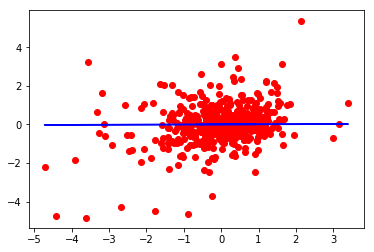

In [55]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.show()

In [56]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

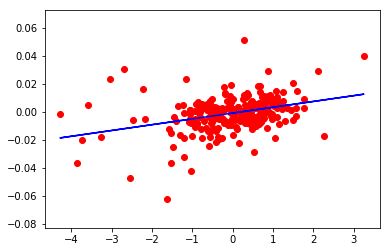

In [58]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.show()

In [59]:
err = y_test - y_pred

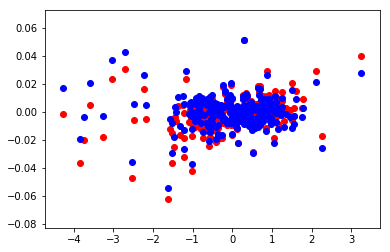

In [61]:
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, err, color = 'blue')

### 考虑距离的斜率，按斜率分类，再对回报r及距离做线性回归

距离变化为负值分为一类，变化为正值分为一类

In [62]:
p1=p[p['d']<0]
p2=p[p['d']>=0]

In [63]:
x1 = p1['diff'].values
y1 = p1['r'].values
x2 = p2['diff'].values
y2 = p2['r'].values

In [64]:
X=x1.reshape((-1, 1))
y=y1.reshape((-1, 1))

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_test, y_test)
display(regressor.score(X_test,y_test), regressor.coef_, regressor.intercept_)

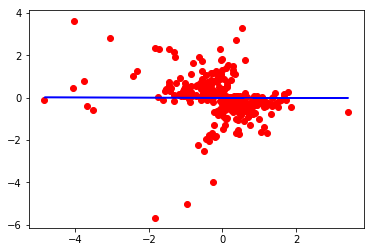

In [72]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.show()

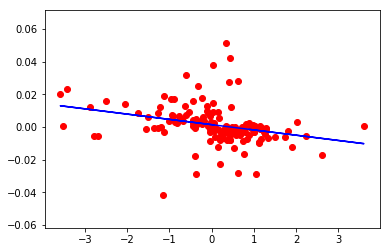

In [73]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.show()

In [74]:
X=x2.reshape((-1, 1))
y=y2.reshape((-1, 1))

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_test, y_test)
display(regressor.score(X_test,y_test), regressor.coef_, regressor.intercept_)

0.71372252477132847

array([[ 0.01147721]])

array([-0.00149979])

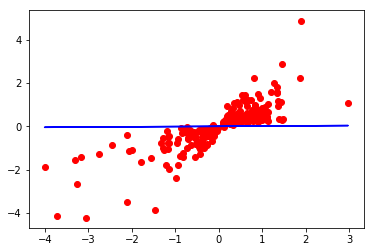

In [75]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.show()

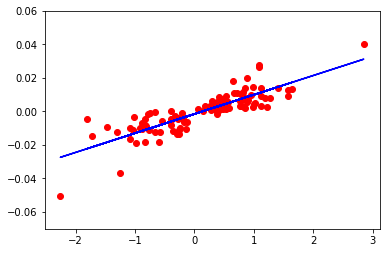

In [76]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.show()

 Four scenarios: 

1) low R-square and low p-value (p-value <= 0.05)

2) low R-square and high p-value (p-value > 0.05)

3) high R-square and low p-value

4) high R-square and high p-value

Interpretation:

1) means that your model doesn't explain much of variation of the data but it is significant (better than not having a model)

2) means that your model doesn't explain much of variation of the data and it is not significant (worst scenario)

3) means your model explains a lot of variation within the data and is significant (best scenario)

4) means that your model explains a lot of variation within the data but is not significant (model is worthless)